<a href="https://colab.research.google.com/github/faizanMayo786/Image_Classifier/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 27s 0us/step


In [ ]:

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
print(model)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4413 - accuracy: 0.4825 - val_loss: 1.1886 - val_accuracy: 0.5825
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0826 - accuracy: 0.6179 - val_loss: 1.0084 - val_accuracy: 0.6450
Epoch 3/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9261 - accuracy: 0.6778 - val_loss: 1.0022 - val_accuracy: 0.6576
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8207 - accuracy: 0.7137 - val_loss: 0.9090 - val_accuracy: 0.6889
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7372 - accuracy: 0.7432 - val_loss: 0.9152 - val_accuracy: 0.6867
Epoch 6/10
1563/1563 [==============================] - 41s 27ms/step - loss: 0.6623 - accuracy: 0.7687 - val_loss: 0.9214 - val_accuracy: 0.6928
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.5935 - accuracy: 0.7915 - val_loss: 0.8936 -

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 2s - loss: 1.0541 - accuracy: 0.7019 - 2s/epoch - 8ms/step
Test accuracy: 0.7019000053405762


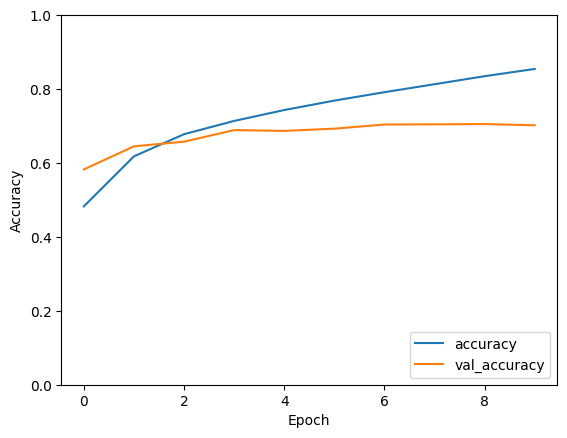

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Save the trained model
model.save('my_model.keras')


## Using the Above Model in program


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import requests

# Load the saved model
loaded_model = tf.keras.models.load_model('my_model.keras')


In [ ]:
# URL of the network image
image_url = 'https://res.cloudinary.com/yourmechanic/image/upload/dpr_auto,f_auto,q_auto/v1/article_images/1_How_to_Gift_a_Vehicle_a_car_with_a_bow_on_it'

# Send an HTTP GET request to the image URL
response = requests.get(image_url)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    # Save the image to a file
    with open('downloaded_image.jpg', 'wb') as file:
        file.write(response.content)
else:
    print('Failed to download the image')

In [ ]:
# Preprocess a custom input image (similar to the previous example)
custom_image_path = 'downloaded_image.jpg'  # Replace with the path to your image
custom_image = image.load_img(custom_image_path, target_size=(32, 32))
custom_image = image.img_to_array(custom_image)
custom_image = np.expand_dims(custom_image, axis=0)
custom_image = custom_image / 255.0  # Normalize pixel values


In [ ]:
# Define the class labels mapping
class_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Use the loaded image for predictions
predictions = model.predict(custom_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the class index to a human-readable label
predicted_class_label = class_labels[predicted_class_index]

# Display the human-readable label
print(f'Predicted class: {predicted_class_label}')

1/1 [==============================] - 0s 18ms/step
Predicted class: automobile
